# Dreamer Network

In [1]:
import numpy as np
import cv2
from pathlib import Path

from models.dream_model import DreamerNetwork
import utils

import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline
plt.style.use("ggplot")

from IPython.display import HTML, Image, display, clear_output

Using TensorFlow backend.


## Create a simple animation

In [2]:
# Generate a really simple animation

n_images = 500
image_width = 64
image_height = 64

images = np.zeros((n_images, image_height, image_width, 3), dtype=np.uint8)

ball_step_size = 2
goes_left = True
x = 32
y = 32

for image in images:
    if goes_left:
        if x >= image_width:
            goes_left = False
        x += ball_step_size
    else:
        if x <= 0:
            goes_left = True
        x -= ball_step_size
        
    image = cv2.circle(image, (x, y), 10, (255, 0, 0), cv2.FILLED)

In [26]:
images_to_animate = images.copy()[0:200]

fig = plt.figure(figsize=(5, 3))

ax = fig.add_subplot(1, 1, 1)
ax.set_title("Real world observation")
ax.set_xticks([])
ax.set_yticks([])
ax_img = ax.imshow(images_to_animate[0])

plt.close()

def animate(index_of_frame):
    ax_img.set_data(images_to_animate[index_of_frame])
    return (ax_img,)

anim = animation.FuncAnimation(fig, animate, frames=len(images_to_animate), interval=41, blit=True)

animation_file_path = "./art/simple_animation.mp4"
animation_file_path_gif = str(Path(animation_file_path).with_suffix(".gif"))
anim.save(animation_file_path, writer='ffmpeg', fps=24)

In [27]:
utils.convert_video_to_gif(animation_file_path, animation_file_path_gif)

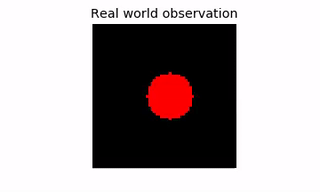

In [28]:
Image(animation_file_path_gif)

In [6]:
# images = images.astype(np.float32) / 255.0

## Have an experience about the world

In [11]:
dream_model = DreamerNetwork(image_height=image_height, image_width=image_width, latent_dim=32, time_steps=4)

In [12]:
vae_conf_dict = dream_model.init_default_vae_train_dict()
vae_conf_dict["callbacks"] = []

In [13]:
vae_conf_dict

{'batch_size': 32,
 'epochs': 100,
 'validation_split': 0.2,
 'shuffle': True,
 'callbacks': []}

In [15]:
hist_vae, hist_rnn = dream_model.fit(images, vae_train_config_dict=vae_conf_dict)

Training VAE...

Train on 400 samples, validate on 100 samples
Epoch 1/100
160/400 [===========>..................] - ETA: 0s - loss: 18432691.6000 - vae_r_loss: 18432586.4000 - vae_kl_loss: 106.2545

D:\Projects\Image-Sequence-Generation-With-VAE-and-RNN\models\dream_model.py:47: UserWarning: There is no custom RNN training config dict given. Training with default config:
{'batch_size': 32, 'epochs': 100, 'validation_split': 0.2, 'shuffle': True, 'callbacks': [<keras.callbacks.EarlyStopping object at 0x00000248B9C66F28>]}
  rnn_train_config_dict))


400/400 [==============================] - 0s 1ms/step - loss: 18432355.0400 - vae_r_loss: 18432253.6800 - vae_kl_loss: 101.6976 - val_loss: 18368131.6800 - val_vae_r_loss: 18368045.2800 - val_vae_kl_loss: 85.8091
Epoch 2/100
400/400 [==============================] - 0s 995us/step - loss: 18432327.6000 - vae_r_loss: 18432251.3600 - vae_kl_loss: 76.2267 - val_loss: 18368126.7200 - val_vae_r_loss: 18368054.5600 - val_vae_kl_loss: 71.0298
Epoch 3/100
400/400 [==============================] - 0s 983us/step - loss: 18432315.5200 - vae_r_loss: 18432241.6000 - vae_kl_loss: 73.5208 - val_loss: 18368074.4800 - val_vae_r_loss: 18368008.2400 - val_vae_kl_loss: 66.7658
Epoch 4/100
400/400 [==============================] - 0s 972us/step - loss: 18432244.6400 - vae_r_loss: 18432177.8400 - vae_kl_loss: 66.3739 - val_loss: 18368024.8800 - val_vae_r_loss: 18367964.8000 - val_vae_kl_loss: 60.0442
Epoch 5/100
400/400 [==============================] - 0s 1000us/step - loss: 18432192.4000 - vae_r_loss:

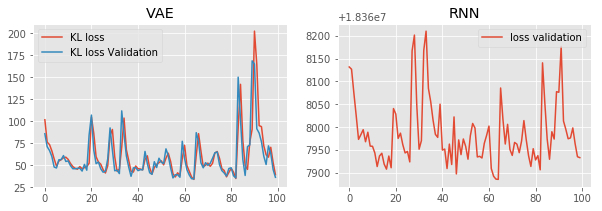

In [22]:
fig = plt.figure(figsize=(10, 3))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("VAE")
ax1.plot(hist_vae.history["vae_kl_loss"], label="KL loss")
ax1.plot(hist_vae.history["val_vae_kl_loss"], label="KL loss Validation")
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("RNN")
ax2.plot(hist_vae.history["loss"], label="loss")
ax2.plot(hist_vae.history["val_loss"], label="loss validation")
ax2.legend();

## Let's Dream

In [17]:
dream_images = dream_model.dream(300, temperature=1.0)

In [18]:
dream_images.shape

(300, 64, 64, 3)

In [23]:
fig = plt.figure(figsize=(5, 3))

ax = fig.add_subplot(1, 1, 1)
ax.set_title("Dream of the network about the real world")
ax.set_xticks([])
ax.set_yticks([])
ax_img = ax.imshow(dream_images[0])

plt.close()

def animate(index_of_frame):
    ax_img.set_data(dream_images[index_of_frame])
    return (ax_img,)

anim = animation.FuncAnimation(fig, animate, frames=len(dream_images), interval=41, blit=True)

dream_animation_file_path = "./art/simple_dream_animation.mp4"
dream_animation_file_path_gif = str(Path(dream_animation_file_path).with_suffix(".gif"))
anim.save(dream_animation_file_path, writer='ffmpeg', fps=24)

In [24]:
utils.convert_video_to_gif(dream_animation_file_path, dream_animation_file_path_gif)

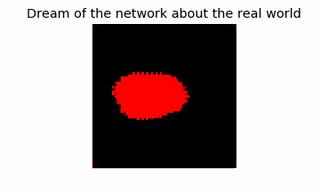

In [25]:
Image(dream_animation_file_path_gif)